In [14]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time

#import k-fold
from sklearn.model_selection import KFold

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [15]:
data = np.loadtxt('final_data.txt', delimiter=';')

# number of training data
n = data.shape[0] #YOUR CODE HERE
print(n)

#select the train data and test data
idx = np.random.permutation(range(n))
idx_test = idx[:271]
idx_train = idx[271:1471]
#print(idx_train)
#print(len(idx_train))
#print(len(idx_test))
train_data = data[idx_train,:]
test_data = data[idx_test, :]

#input the data, X
X = np.ones([1200, 2])
X [:, 0] = train_data[:, 0]
X [:, 1] = train_data[:, 1]
#print(X.shape)

#input y
y = np.ones([1200, 1])
y [:, 0] = train_data[:, 2]
#print (y)

1471


In [16]:
#choose the most important features only. 
#I will do all features, and then pick some

In [17]:
#linear regression with all features
#try the normalised equation
#calculate w by normal equation
#def norm_equa (X, y):
    #z = (X.T).dot(X)
    #zinv = np.linalg.inv(z), reprot error, there is no inverse matrix of z, use gradient descent
    #print(zinv)
    #e = (zinv).dot(X.T)
    #w = e.dot(y)
    #return w
#print (norm_equa (X, y))

In [18]:
#use gradient descend
#initialise w, by the randon munber
#w = np.ones([12, 1])
#print(w)
#for i in range (1, 12):
    #w[i] = np.random.uniform(-1,1)
#print(w)

In [19]:
#define the predictive function
def pred_f (X, w):
    y_pred = X.dot(w)
    return y_pred
#print(pred_f(X,w))

In [20]:
#define the loss function
def loss_reg(w,X,y,reg): 
    n = len(y)
    w = w.squeeze()[:,None]
    y_pred = pred_f(X,w)
    loss = 1/n* (y_pred - y).T.dot(y_pred - y) 
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss
#print(mse_f(X, w, y))

In [21]:
#compute optimum w_solution
def compute_w_solution(X,y,reg):  #the method to determine w by minimizing the loss
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_reg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':100})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_reg(w_solution,X,y,reg)
    return w_solution, loss_solution

In [22]:
#regularized plot graph
def loss_plot_reg (list_reg, train_loss_tab, val_loss_tab):
    x = list_reg
    plt.figure(1)
    plt.plot(x, train_loss_tab,label='Train loss'.format(i=1))
    plt.plot(x, val_loss_tab,label='Val loss'.format(i=2))
    plt.legend(loc='best')
    plt.title('Loss w.r.t. reg)')
    plt.xlabel('reg')
    plt.ylabel('Loss')
    plt.show() 

In [23]:
#loss plot graph
def loss_plot_d (list_d, train_loss_tab, val_loss_tab):
    x = list_d
    plt.figure(1)
    plt.plot(x, train_loss_tab,label='Train loss'.format(i=1))
    plt.plot(x, val_loss_tab,label='Val loss'.format(i=2))
    plt.legend(loc='best')
    plt.title('Loss w.r.t. d (capacity)')
    plt.xlabel('d')
    plt.ylabel('Loss')
    plt.show() 

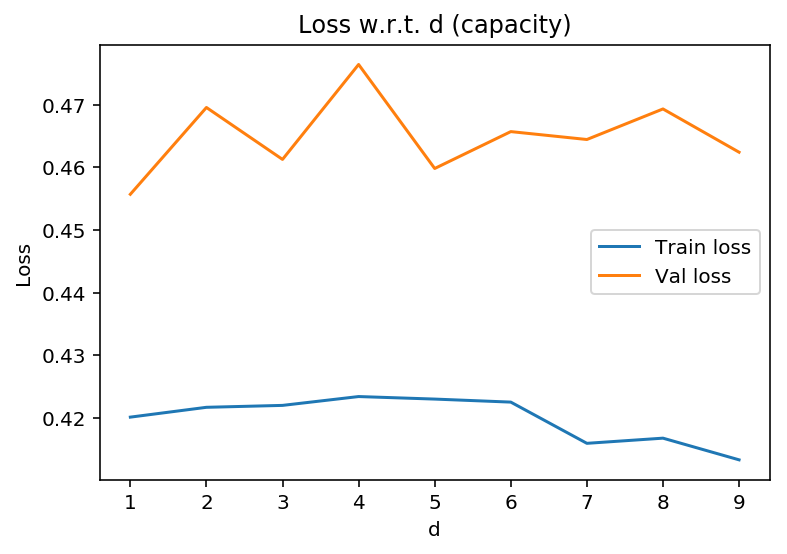

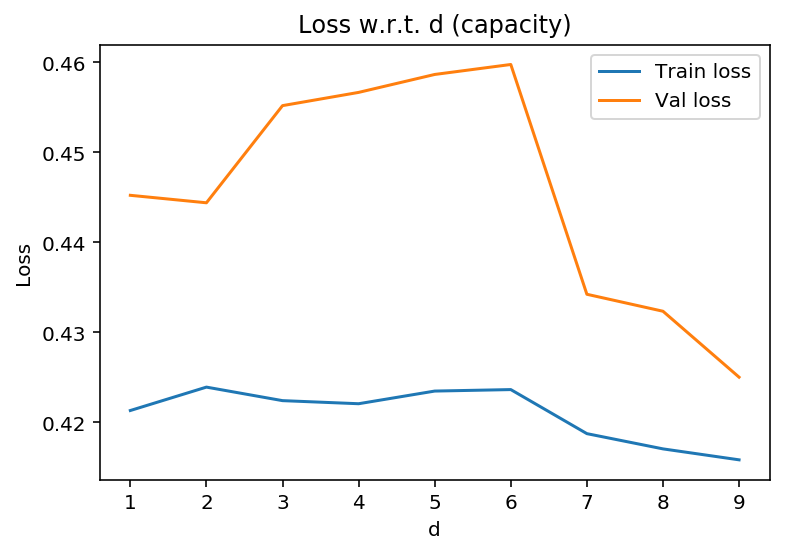

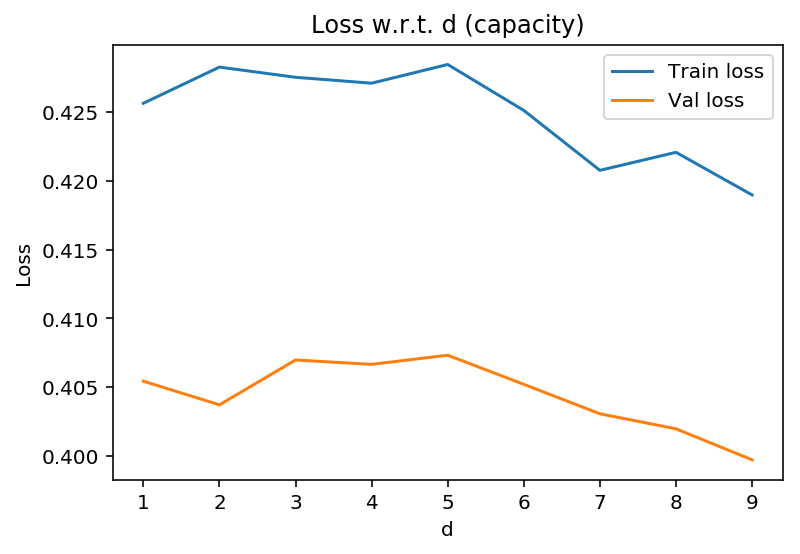

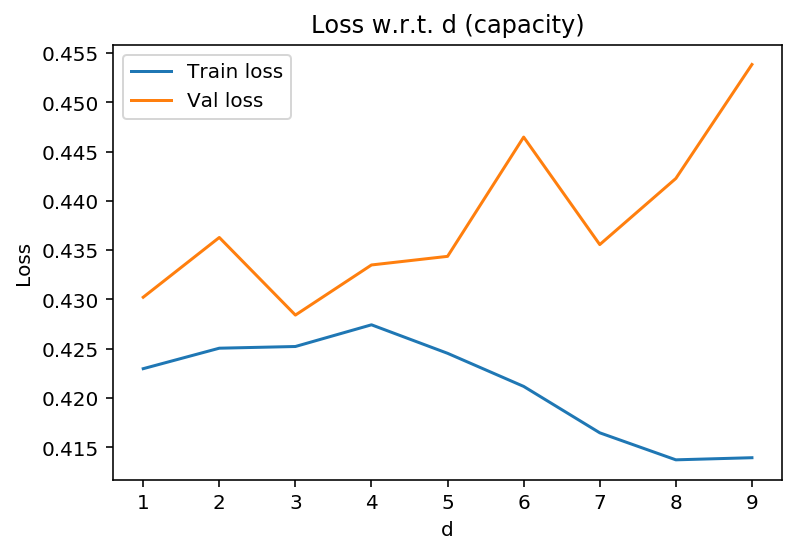

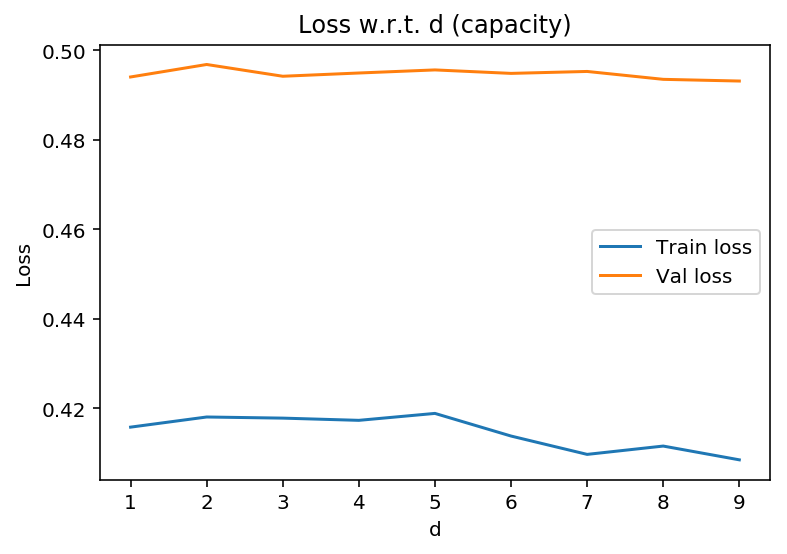

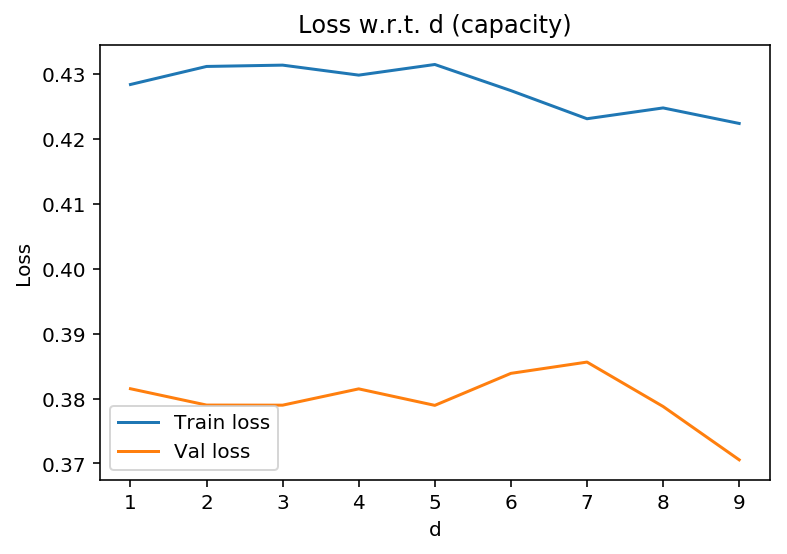

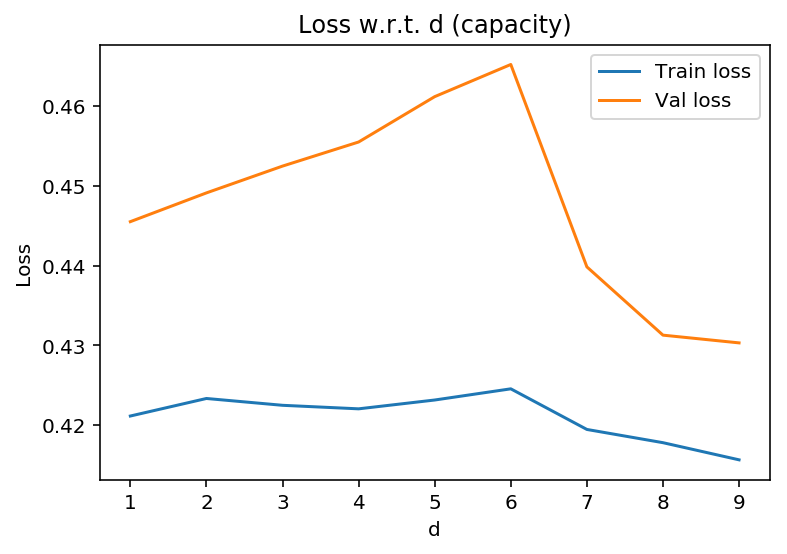

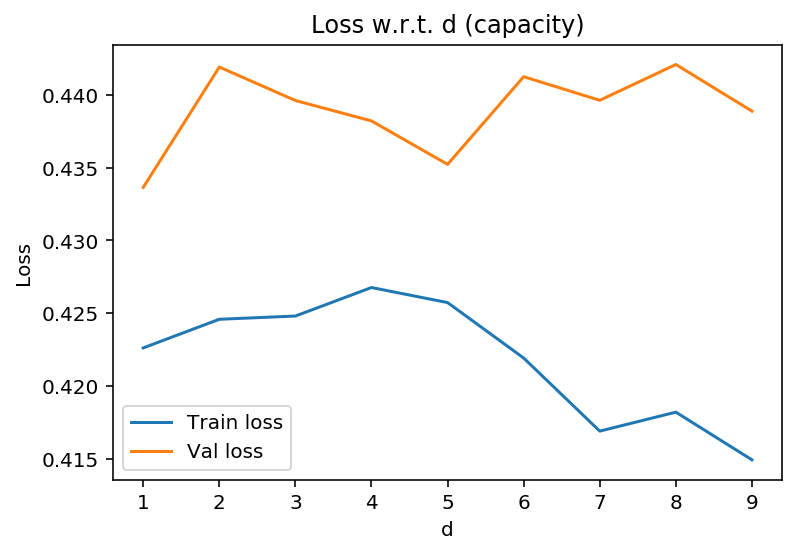

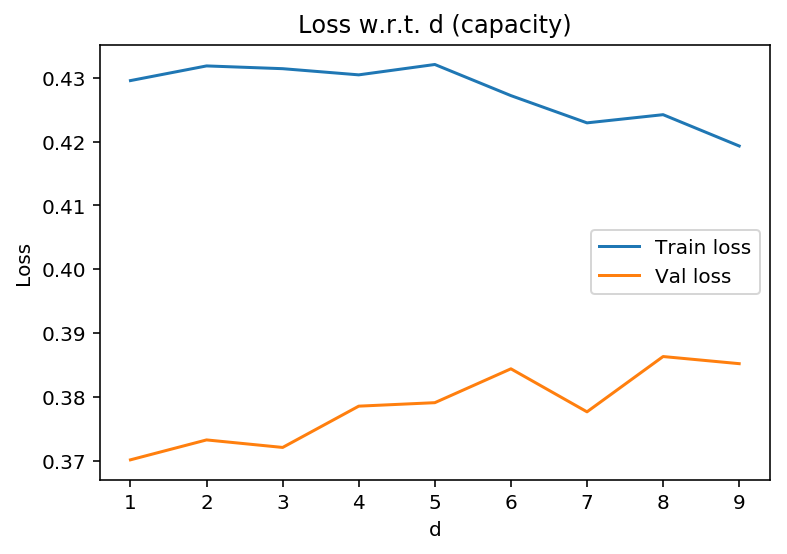

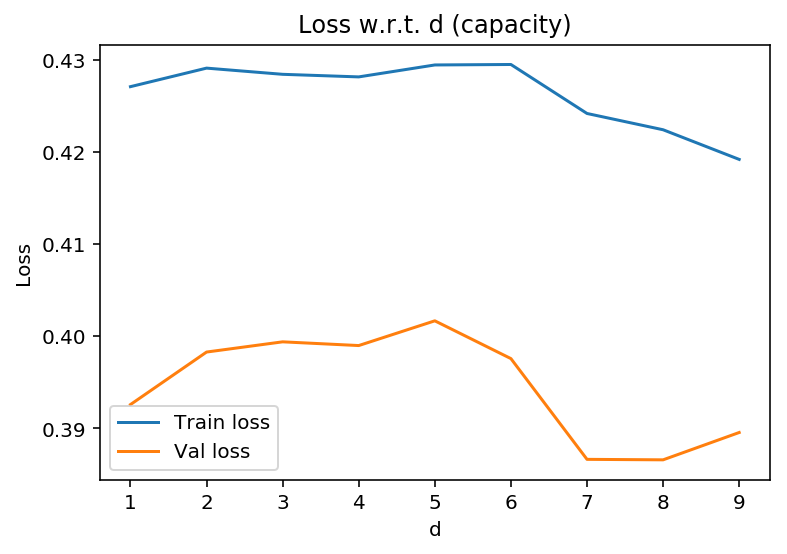

[ 8.48878108  8.54951605  8.5422025   8.57557895  8.57224088  8.58131417
  8.45029767  8.45318051  8.41076251]


In [ ]:
#represent x in polynomial form, determine the degree with smallest loss
kf = KFold(n_splits=10)
reg = 0 #start with zero reg to find optimum d
list_d = list(range(1,10))
train_loss_tab_d = np.zeros(len(list_d))
val_loss_tab_d = np.zeros(len(list_d))
mean_loss_tab_d = np.zeros(len(list_d))
for train_index,test_index in kf.split(X):
        #print("Train Index:",train_index,",Test Index:",test_index)
        train_X, val_X = X[train_index],X[test_index]
        train_y, val_y = y[train_index],y[test_index]
        for i,d in enumerate(list_d):
            poly = PolynomialFeatures(d)
            train_X_poly = poly.fit_transform(train_X)
            train_w_solution, train_loss_solution = compute_w_solution(train_X_poly,train_y,reg)
            train_loss_tab_d[i] = train_loss_solution
            val_X_poly = poly.fit_transform(val_X)
            val_loss = loss_reg(train_w_solution,val_X_poly,val_y,reg)
            val_loss_tab_d[i] = val_loss
            mean_loss_tab_d[i] = mean_loss_tab_d[i] + train_loss_tab_d[i] + val_loss_tab_d[i]
        loss_plot_d (list_d, train_loss_tab_d, val_loss_tab_d)
print(mean_loss_tab_d)
        #how to choose optimum d for each iteration of k-fold? by hand?
#we pick the d that gives minimum loss: d = 2

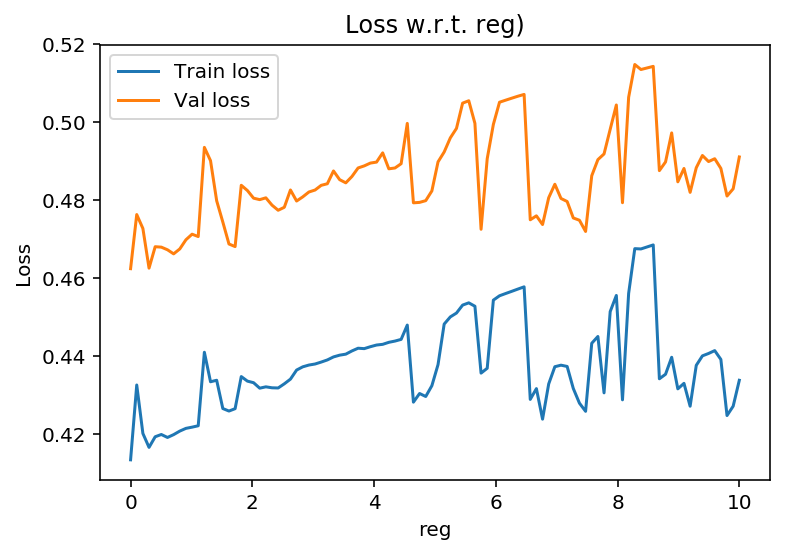

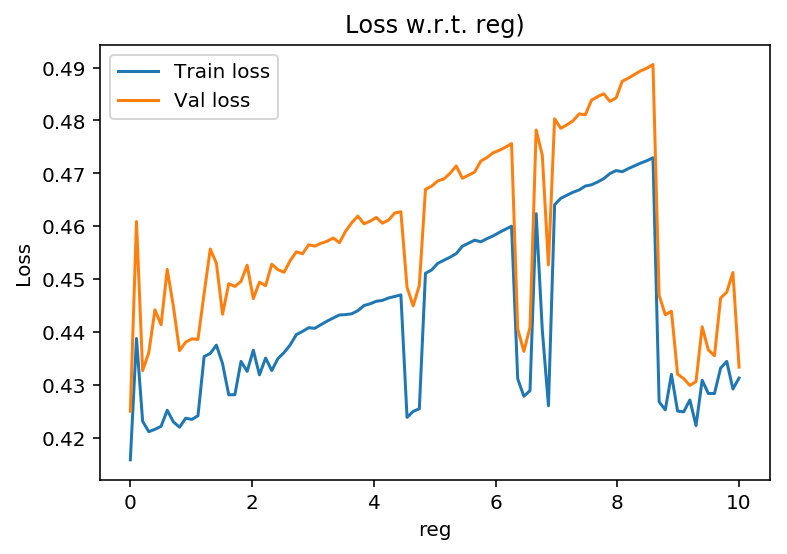

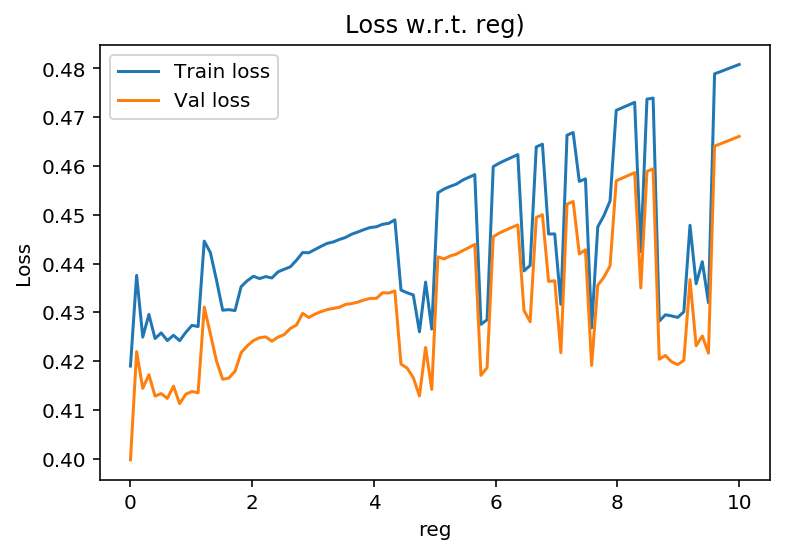

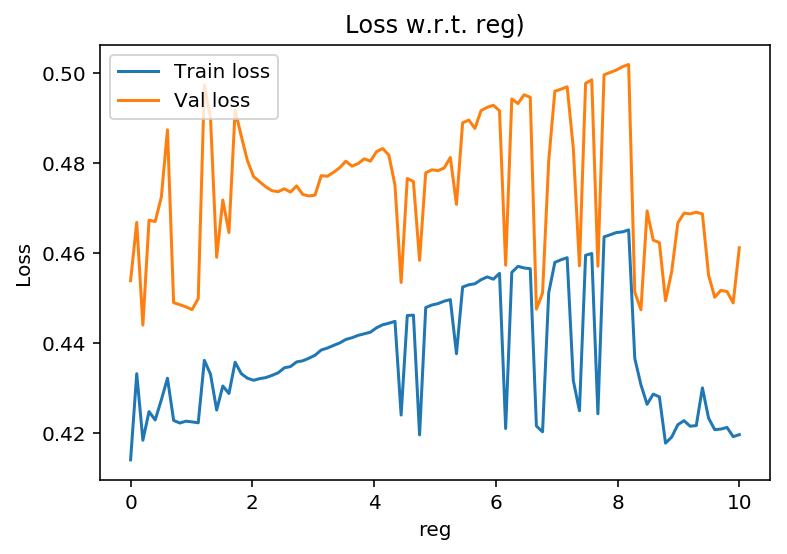

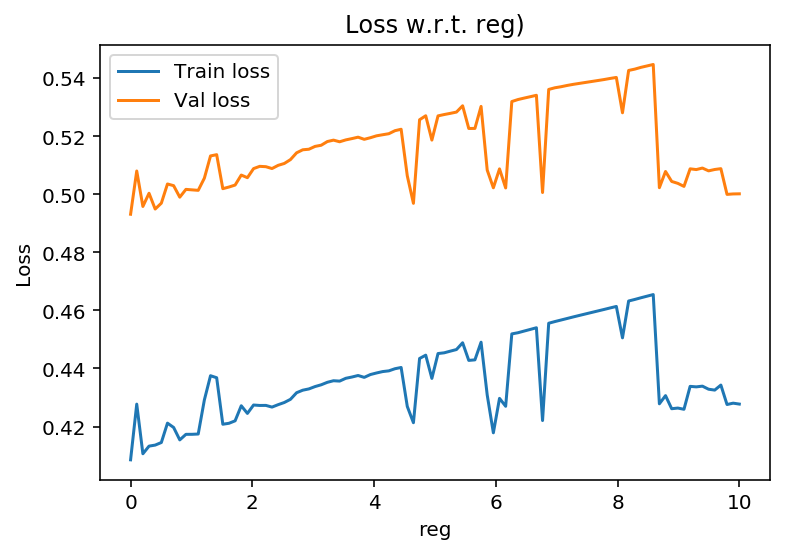

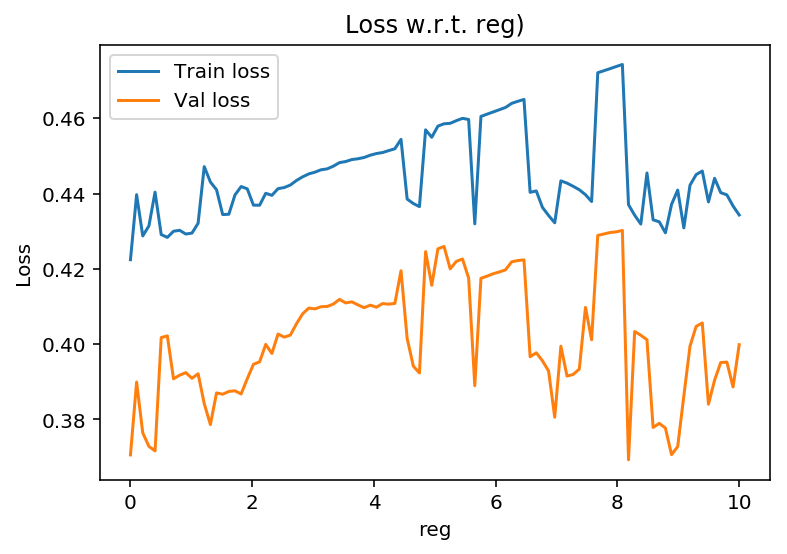

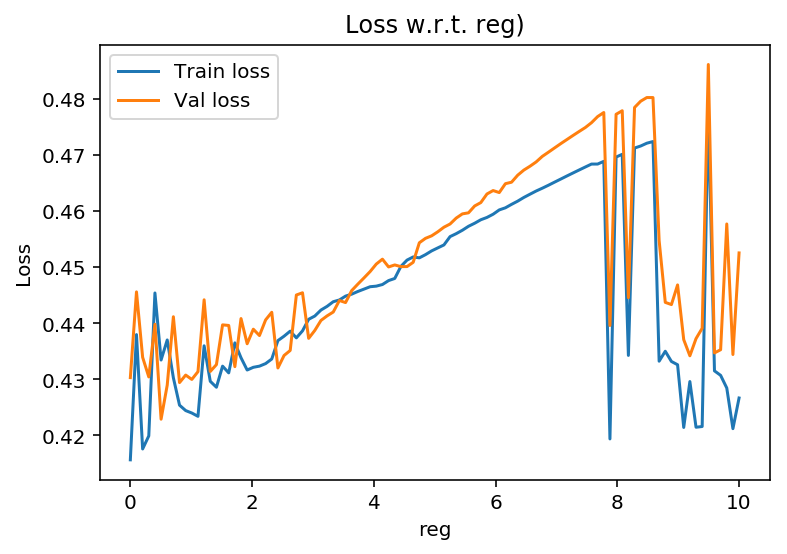

In [ ]:
# determine the regularized parameter under d
d = 9
#replace with the d we get
poly = PolynomialFeatures(d)
X_poly = poly.fit_transform(X)
reg = np.linspace(0,10,100)
list_reg = list(reg)
train_loss_tab_reg = np.zeros(len(list_reg))
val_loss_tab_reg = np.zeros(len(list_reg))
mean_loss_tab_reg = np.zeros(len(list_reg))
for train_index,test_index in kf.split(X_poly):
        #print("Train Index:",train_index,",Test Index:",test_index)
        train_X, val_X = X_poly[train_index],X_poly[test_index]
        train_y, val_y = y[train_index],y[test_index]
        for i,reg in enumerate(list_reg):
            train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)
            train_loss_tab_reg[i] = train_loss_solution
            val_loss = loss_reg(train_w_solution,val_X,val_y,reg)
            val_loss_tab_reg[i] = val_loss
            mean_loss_tab_reg[i] = mean_loss_tab_reg[i] + train_loss_tab_reg[i] + val_loss_tab_reg[i]
        loss_plot_reg (list_reg, train_loss_tab_reg, val_loss_tab_reg)
print(mean_loss_tab_reg)
        #how to choose optimum reg for each iteration of k-fold? by hand?
#we pick the d that gives minimum loss: reg = 0
#we finally get the optimum equation

In [ ]:
reg = np.array(range(-6,4),np.float32) #why this array define like this?
reg = 10**reg
list_reg = list(reg)
print(reg)

In [ ]:
kf = KFold(n_splits=4)
reg = 0 #start with zero reg to find optimum d
list_d = list(range(1,10))
train_loss_tab_d = np.zeros(len(list_d))
val_loss_tab_d = np.zeros(len(list_d))
reg = np.linspace(0,10,100)
list_reg = list(reg)
train_loss_tab_reg = np.zeros(len(list_reg))
val_loss_tab_reg = np.zeros(len(list_reg))
for train_index,test_index in kf.split(X):
        #print("Train Index:",train_index,",Test Index:",test_index)
        train_X, val_X = X[train_index],X[test_index]
        train_y, val_y = y[train_index],y[test_index]
        for i,d in enumerate(list_d): 
            poly = PolynomialFeatures(d)
            train_X_poly = poly.fit_transform(train_X)
            for i,reg in enumerate(list_reg):
                train_w_solution, train_loss_solution = compute_w_solution(train_X_poly,train_y,reg)
                train_loss_tab_d[i] = train_loss_solution
                val_X_poly = poly.fit_transform(val_X)
                val_loss = loss_reg(train_w_solution,val_X_poly,val_y,reg)
                val_loss_tab_d[i] = val_loss
        loss_plot_d (list_d, train_loss_tab_d, val_loss_tab_d)
        #how to choose optimum d for each iteration of k-fold? by hand?
#we pick the d that gives minimum loss: d = 2

In [ ]:
#the loss tested by test data

In [ ]:
#visualization & result presentation